start wrapping data...
start wrapping training data...
finish...
start wrapping testing data
finish wrapping data...
Tensor("Reshape_1:0", shape=(5754, 100, 32), dtype=float32)
Tensor("Mean:0", shape=(5754, 32), dtype=float32)
Tensor("Reshape_3:0", shape=(5754, 100, 32), dtype=float32)
Tensor("Mean_1:0", shape=(5754, 32), dtype=float32)
Tensor("Reshape_9:0", shape=(5754, 100, 32), dtype=float32)
Tensor("Mean_2:0", shape=(5754, 32), dtype=float32)
Tensor("Reshape_11:0", shape=(1, 6158, 32), dtype=float32)
Tensor("Mean_5:0", shape=(1, 32), dtype=float32)
Tensor("Reshape_17:0", shape=(1, 8798, 32), dtype=float32)
Tensor("Mean_6:0", shape=(1, 32), dtype=float32)
start doing prediction...
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


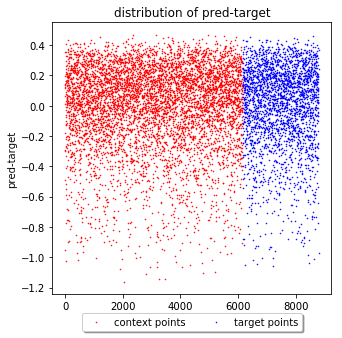

Iteration: 0, train_loss: 0.8510801792144775
Iteration: 0, validation_loss: 0.8678299784660339


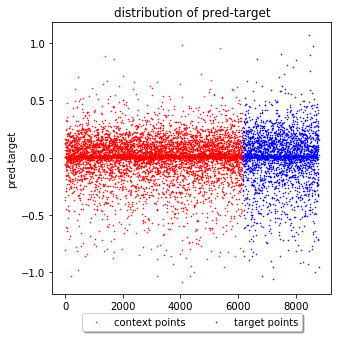

Iteration: 2000, train_loss: -1.2570611238479614
Iteration: 2000, validation_loss: 0.776773989200592


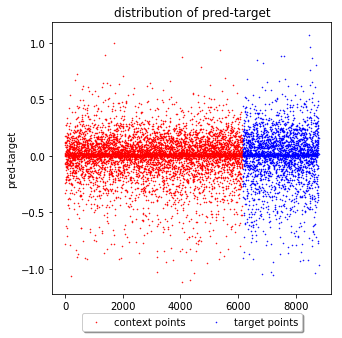

Iteration: 4000, train_loss: -1.281374454498291
Iteration: 4000, validation_loss: 0.8017085194587708


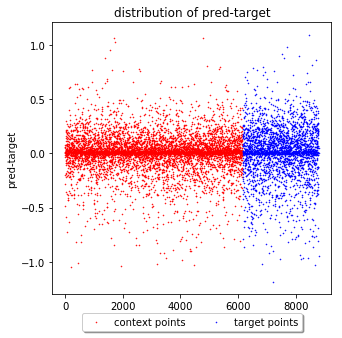

Iteration: 6000, train_loss: -1.341713309288025
Iteration: 6000, validation_loss: 0.7286782264709473
best training loss:
-1.3417133
best validation loss:
0.7286782
hidden size:
32
batch size:
100
start wrapping data...
start wrapping training data...
finish...
start wrapping testing data
finish wrapping data...
Tensor("Reshape_1:0", shape=(57551, 10, 16), dtype=float32)
Tensor("Mean:0", shape=(57551, 16), dtype=float32)
Tensor("Reshape_3:0", shape=(57551, 10, 16), dtype=float32)
Tensor("Mean_1:0", shape=(57551, 16), dtype=float32)
Tensor("Reshape_9:0", shape=(57551, 10, 16), dtype=float32)
Tensor("Mean_2:0", shape=(57551, 16), dtype=float32)
Tensor("Reshape_11:0", shape=(1, 6141, 16), dtype=float32)
Tensor("Mean_5:0", shape=(1, 16), dtype=float32)
Tensor("Reshape_17:0", shape=(1, 8773, 16), dtype=float32)
Tensor("Mean_6:0", shape=(1, 16), dtype=float32)
start doing prediction...
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running loc

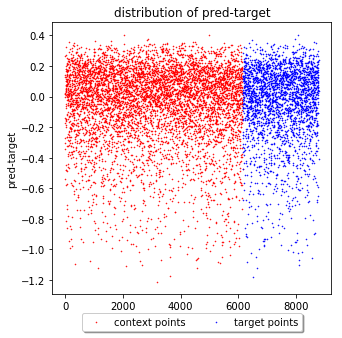

Iteration: 0, train_loss: 0.5511395931243896
Iteration: 0, validation_loss: 0.5048589706420898


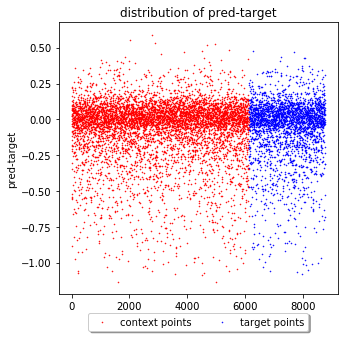

Iteration: 2000, train_loss: -1.1821200847625732
Iteration: 2000, validation_loss: 1.1672227382659912


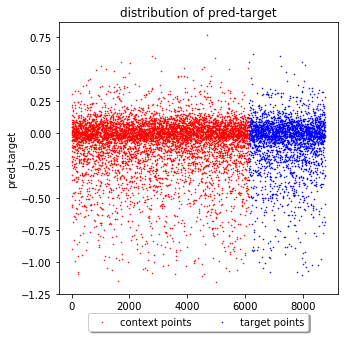

Iteration: 4000, train_loss: -1.23625648021698
Iteration: 4000, validation_loss: 1.126200556755066


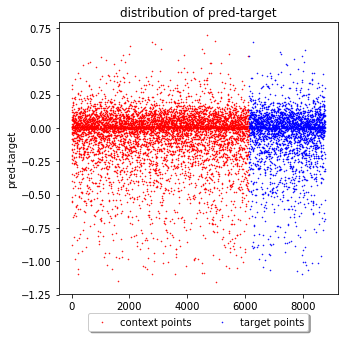

Iteration: 6000, train_loss: -1.2525101900100708
Iteration: 6000, validation_loss: 0.8960516452789307
best training loss:
-1.2525102
best validation loss:
0.504859
hidden size:
16
batch size:
10
start wrapping data...
start wrapping training data...
finish...
start wrapping testing data
finish wrapping data...
Tensor("Reshape_1:0", shape=(2877, 200, 16), dtype=float32)
Tensor("Mean:0", shape=(2877, 16), dtype=float32)
Tensor("Reshape_3:0", shape=(2877, 200, 16), dtype=float32)
Tensor("Mean_1:0", shape=(2877, 16), dtype=float32)
Tensor("Reshape_9:0", shape=(2877, 200, 16), dtype=float32)
Tensor("Mean_2:0", shape=(2877, 16), dtype=float32)
Tensor("Reshape_11:0", shape=(1, 6151, 16), dtype=float32)
Tensor("Mean_5:0", shape=(1, 16), dtype=float32)
Tensor("Reshape_17:0", shape=(1, 8788, 16), dtype=float32)
Tensor("Mean_6:0", shape=(1, 16), dtype=float32)
start doing prediction...
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_i

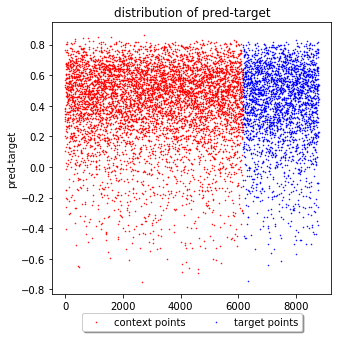

Iteration: 0, train_loss: 0.7285518646240234
Iteration: 0, validation_loss: 0.7690738439559937


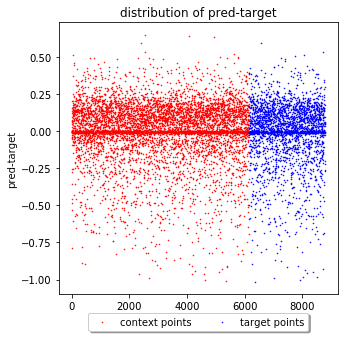

Iteration: 2000, train_loss: -0.32780805230140686
Iteration: 2000, validation_loss: -0.306462824344635


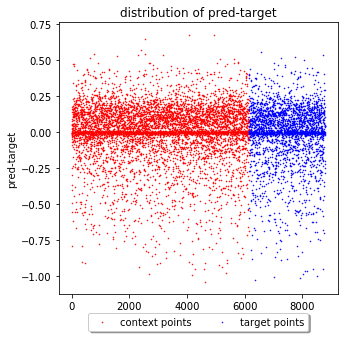

Iteration: 4000, train_loss: -0.38066476583480835
Iteration: 4000, validation_loss: -0.31243404746055603


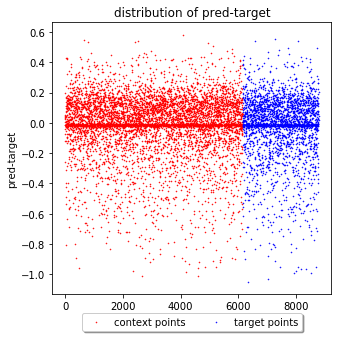

Iteration: 6000, train_loss: -0.4236679971218109
Iteration: 6000, validation_loss: -0.2904941737651825


In [ ]:
def ss():    
    import tensorflow as tf
    import numpy as np
    import matplotlib.pyplot as plt
    import collections
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    from math import pi
    from random import randint
    import glob
    import scipy
    import seaborn as sns
    import random
    
    def batch_mlp(input, output_sizes, variable_scope):
      """Apply MLP to the final axis of a 3D tensor (reusing already defined MLPs).

      Args:
        input: input tensor of shape [B,n,d_in].
        output_sizes: An iterable containing the output sizes of the MLP as defined 
            in `basic.Linear`.
        variable_scope: String giving the name of the variable scope. If this is set
            to be the same as a previously defined MLP, then the weights are reused.

      Returns:
        tensor of shape [B,n,d_out] where d_out=output_sizes[-1]
      """
      # Get the shapes of the input and reshape to parallelise across observations
      batch_size, _, filter_size = input.shape.as_list()
      output = tf.reshape(input, (-1, filter_size))
      output.set_shape((None, filter_size))

      # Pass through MLP
      with tf.variable_scope(variable_scope, reuse=tf.AUTO_REUSE):
        for i, size in enumerate(output_sizes[:-1]):
          output = tf.nn.relu(
              tf.layers.dense(output, size, name="layer_{}".format(i)))

        # Last layer without a ReLu
        output = tf.layers.dense(
            output, output_sizes[-1], name="layer_{}".format(i + 1))

      # Bring back into original shape
      output = tf.reshape(output, (batch_size, -1, output_sizes[-1]))
      return output

    def Normalization_old(data):
      data_f = data.astype(float)
      data_mean = np.mean(data_f, axis=0, keepdims=True)
      data_n = data_f - data_mean
      data_range = np.max(np.abs(data_n), axis=0, keepdims=True)
      data_n = data_n / data_range

      return data_n

    class DeterministicEncoder(object):
      """The Deterministic Encoder."""

      def __init__(self, output_sizes, attention):
        """(A)NP deterministic encoder.

        Args:
          output_sizes: An iterable containing the output sizes of the encoding MLP.
          attention: The attention module.
        """
        self._output_sizes = output_sizes
        self._attention = attention

      def __call__(self, context_x, context_y, target_x):
        """Encodes the inputs into one representation.

        Args:
          context_x: Tensor of shape [B,observations,d_x]. For this 1D regression
              task this corresponds to the x-values.
          context_y: Tensor of shape [B,observations,d_y]. For this 1D regression
              task this corresponds to the y-values.
          target_x: Tensor of shape [B,target_observations,d_x]. 
              For this 1D regression task this corresponds to the x-values.

        Returns:
          The encoded representation. Tensor of shape [B,target_observations,d]
        """

        # Concatenate x and y along the filter axes
        encoder_input = tf.concat([context_x, context_y], axis=-1)

        # Pass final axis through MLP
        hidden = batch_mlp(encoder_input, self._output_sizes, 
                           "deterministic_encoder")

        # Apply attention
        with tf.variable_scope("deterministic_encoder", reuse=tf.AUTO_REUSE):
            hidden = self._attention(context_x, target_x, hidden)

        return hidden

    class LatentEncoder(object):
      """The Latent Encoder."""

      def __init__(self, output_sizes, num_latents):
        """(A)NP latent encoder.

        Args:
          output_sizes: An iterable containing the output sizes of the encoding MLP.
          num_latents: The latent dimensionality.
        """
        self._output_sizes = output_sizes
        self._num_latents = num_latents

      def __call__(self, x, y):
        """Encodes the inputs into one representation.

        Args:
          x: Tensor of shape [B,observations,d_x]. For this 1D regression
              task this corresponds to the x-values.
          y: Tensor of shape [B,observations,d_y]. For this 1D regression
              task this corresponds to the y-values.

        Returns:
          A normal distribution over tensors of shape [B, num_latents]
        """

        # Concatenate x and y along the filter axes
        encoder_input = tf.concat([x, y], axis=-1)

        # Pass final axis through MLP
        hidden = batch_mlp(encoder_input, self._output_sizes, "latent_encoder")
        print(hidden)
        # Aggregator: take the mean over all points
        hidden = tf.reduce_mean(hidden, axis=1)
        print(hidden)

        # Have further MLP layers that map to the parameters of the Gaussian latent
        with tf.variable_scope("latent_encoder", reuse=tf.AUTO_REUSE):
          # First apply intermediate relu layer 
          hidden = tf.nn.relu(
              tf.layers.dense(hidden, 
                              (self._output_sizes[-1] + self._num_latents)/2,
                              name="penultimate_layer"))
          # Then apply further linear layers to output latent mu and log sigma
          mu = tf.layers.dense(hidden, self._num_latents, name="mean_layer")
          log_sigma = tf.layers.dense(hidden, self._num_latents, name="std_layer")

        # Compute sigma
        sigma = 0.1 + 0.9 * tf.sigmoid(log_sigma)

        return tf.contrib.distributions.Normal(loc=mu, scale=sigma)

    class Decoder(object):
      """The Decoder."""

      def __init__(self, output_sizes):
        """(A)NP decoder.

        Args:
          output_sizes: An iterable containing the output sizes of the decoder MLP 
              as defined in `basic.Linear`.
        """
        self._output_sizes = output_sizes

      def __call__(self, representation, target_x):
        """Decodes the individual targets.

        Args:
          representation: The representation of the context for target predictions. 
              Tensor of shape [B,target_observations,?].
          target_x: The x locations for the target query.
              Tensor of shape [B,target_observations,d_x].

        Returns:
          dist: A multivariate Gaussian over the target points. A distribution over
              tensors of shape [B,target_observations,d_y].
          mu: The mean of the multivariate Gaussian.
              Tensor of shape [B,target_observations,d_x].
          sigma: The standard deviation of the multivariate Gaussian.
              Tensor of shape [B,target_observations,d_x].
        """
        # concatenate target_x and representation
        hidden = tf.concat([representation, target_x], axis=-1)

        # Pass final axis through MLP
        hidden = batch_mlp(hidden, self._output_sizes, "decoder")

        # Get the mean an the variance
        mu, log_sigma = tf.split(hidden, 2, axis=-1)

        # Bound the variance
        sigma = 0.1 + 0.9 * tf.nn.softplus(log_sigma)

        # Get the distribution
        dist = tf.contrib.distributions.MultivariateNormalDiag(
            loc=mu, scale_diag=sigma)

        return dist, mu, sigma

    class LatentModel(object):
      """The (A)NP model."""

      def __init__(self, latent_encoder_output_sizes, num_latents,
                   decoder_output_sizes, use_deterministic_path=True, 
                   deterministic_encoder_output_sizes=None, attention=None):
        """Initialises the model.

        Args:
          latent_encoder_output_sizes: An iterable containing the sizes of hidden 
              layers of the latent encoder.
          num_latents: The latent dimensionality.
          decoder_output_sizes: An iterable containing the sizes of hidden layers of
              the decoder. The last element should correspond to d_y * 2
              (it encodes both mean and variance concatenated)
          use_deterministic_path: a boolean that indicates whether the deterministic
              encoder is used or not.
          deterministic_encoder_output_sizes: An iterable containing the sizes of 
              hidden layers of the deterministic encoder. The last one is the size 
              of the deterministic representation r.
          attention: The attention module used in the deterministic encoder.
              Only relevant when use_deterministic_path=True.
        """
        self._latent_encoder = LatentEncoder(latent_encoder_output_sizes, 
                                             num_latents)
        self._decoder = Decoder(decoder_output_sizes)
        self._use_deterministic_path = use_deterministic_path
        if use_deterministic_path:
          self._deterministic_encoder = DeterministicEncoder(
              deterministic_encoder_output_sizes, attention)


      def __call__(self, query, num_targets, target_y=None, test_target_y=None):
        """Returns the predicted mean and variance at the target points.

        Args:
          query: Array containing ((context_x, context_y), target_x) where:
              context_x: Tensor of shape [B,num_contexts,d_x]. 
                  Contains the x values of the context points.
              context_y: Tensor of shape [B,num_contexts,d_y]. 
                  Contains the y values of the context points.
              target_x: Tensor of shape [B,num_targets,d_x]. 
                  Contains the x values of the target points.
          num_targets: Number of target points.
          target_y: The ground truth y values of the target y. 
              Tensor of shape [B,num_targets,d_y].

        Returns:
          log_p: The log_probability of the target_y given the predicted
              distribution. Tensor of shape [B,num_targets].
          mu: The mean of the predicted distribution. 
              Tensor of shape [B,num_targets,d_y].
          sigma: The variance of the predicted distribution.
              Tensor of shape [B,num_targets,d_y].
        """

        (context_x, context_y), target_x = query

        # Pass query through the encoder and the decoder
        prior = self._latent_encoder(context_x, context_y)

        # For training, when target_y is available, use targets for latent encoder.
        # Note that targets contain contexts by design.
        if target_y is None:
          latent_rep = prior.sample()
        # For testing, when target_y unavailable, use contexts for latent encoder.
        else:
          posterior = self._latent_encoder(target_x, target_y)
          latent_rep = posterior.sample()
        latent_rep = tf.tile(tf.expand_dims(latent_rep, axis=1),
                             [1, num_targets, 1])
        if self._use_deterministic_path:
          deterministic_rep = self._deterministic_encoder(context_x, context_y,
                                                          target_x)
          representation = tf.concat([deterministic_rep, latent_rep], axis=-1)
        else:
          representation = latent_rep

        dist, mu, sigma = self._decoder(representation, target_x)

        # If we want to calculate the log_prob for training we will make use of the
        # target_y. At test time the target_y is not available so we return None.
        if target_y is not None:
          log_p = dist.log_prob(target_y)
          posterior = self._latent_encoder(target_x, target_y)
          kl = tf.reduce_sum(
              tf.contrib.distributions.kl_divergence(posterior, prior), 
              axis=-1, keepdims=True)
          kl = tf.tile(kl, [1, num_targets])
          loss = - tf.reduce_mean(log_p - kl / tf.cast(num_targets, tf.float32))
          LL = tf.reduce_mean(log_p, keep_dims=False)
        else:
          log_p = dist.log_prob(test_target_y)
          posterior = self._latent_encoder(target_x, test_target_y)
          kl = tf.reduce_sum(
              tf.contrib.distributions.kl_divergence(posterior, prior), 
              axis=-1, keepdims=True)
          kl = tf.tile(kl, [1, num_targets])
          loss = - tf.reduce_mean(log_p - kl / tf.cast(num_targets, tf.float32))
          #validation_context_loss = - tf.reduce_mean(log_p[:,int(0.5*num_targets):] - kl / tf.cast(num_targets, tf.float32))
          #validation_noncontext_loss =  - tf.reduce_mean(log_p - kl / tf.cast(num_targets, tf.float32))
          LL = None
            #con_y = pred_y[:,:int(0.5 * test_num_total_points)] - target_y[:,:int(0.5 * test_num_total_points)]
          #tar_y = pred_y[:,int(0.5 * test_num_total_points):] - target_y[:,int(0.5 * test_num_total_points):]

        return mu, sigma, log_p, LL, kl, loss

    def uniform_attention(q, v):
      """Uniform attention. Equivalent to np.

      Args:
        q: queries. tensor of shape [B,m,d_k].
        v: values. tensor of shape [B,n,d_v].

      Returns:
        tensor of shape [B,m,d_v].
      """
      total_points = tf.shape(q)[1]
      rep = tf.reduce_mean(v, axis=1, keepdims=True)  # [B,1,d_v]
      rep = tf.tile(rep, [1, total_points, 1])
      return rep

    def laplace_attention(q, k, v, scale, normalise):
      """Computes laplace exponential attention.

      Args:
        q: queries. tensor of shape [B,m,d_k].
        k: keys. tensor of shape [B,n,d_k].
        v: values. tensor of shape [B,n,d_v].
        scale: float that scales the L1 distance.
        normalise: Boolean that determines whether weights sum to 1.

      Returns:
        tensor of shape [B,m,d_v].
      """
      k = tf.expand_dims(k, axis=1)  # [B,1,n,d_k]
      q = tf.expand_dims(q, axis=2)  # [B,m,1,d_k]
      unnorm_weights = - tf.abs((k - q) / scale)  # [B,m,n,d_k]
      unnorm_weights = tf.reduce_sum(unnorm_weights, axis=-1)  # [B,m,n]
      if normalise:
        weight_fn = tf.nn.softmax
      else:
        weight_fn = lambda x: 1 + tf.tanh(x)
      weights = weight_fn(unnorm_weights)  # [B,m,n]
      rep = tf.einsum('bik,bkj->bij', weights, v)  # [B,m,d_v]
      return rep


    def dot_product_attention(q, k, v, normalise):
      """Computes dot product attention.

      Args:
        q: queries. tensor of  shape [B,m,d_k].
        k: keys. tensor of shape [B,n,d_k].
        v: values. tensor of shape [B,n,d_v].
        normalise: Boolean that determines whether weights sum to 1.

      Returns:
        tensor of shape [B,m,d_v].
      """
      d_k = tf.shape(q)[-1]
      scale = tf.sqrt(tf.cast(d_k, tf.float32))
      unnorm_weights = tf.einsum('bjk,bik->bij', k, q) / scale  # [B,m,n]
      if normalise:
        weight_fn = tf.nn.softmax
      else:
        weight_fn = tf.sigmoid
      weights = weight_fn(unnorm_weights)  # [B,m,n]
      rep = tf.einsum('bik,bkj->bij', weights, v)  # [B,m,d_v]
      return rep


    def multihead_attention(q, k, v, num_heads=8):
      """Computes multi-head attention.

      Args:
        q: queries. tensor of  shape [B,m,d_k].
        k: keys. tensor of shape [B,n,d_k].
        v: values. tensor of shape [B,n,d_v].
        num_heads: number of heads. Should divide d_v.

      Returns:
        tensor of shape [B,m,d_v].
      """
      d_k = q.get_shape().as_list()[-1]
      d_v = v.get_shape().as_list()[-1]
      head_size = d_v / num_heads
      key_initializer = tf.random_normal_initializer(stddev=d_k**-0.5)
      value_initializer = tf.random_normal_initializer(stddev=d_v**-0.5)
      rep = tf.constant(0.0)
      for h in range(num_heads):
        o = dot_product_attention(
            tf.layers.Conv1D(head_size, 1, kernel_initializer=key_initializer,
                       name='wq%d' % h, use_bias=False, padding='VALID')(q),
            tf.layers.Conv1D(head_size, 1, kernel_initializer=key_initializer,
                       name='wk%d' % h, use_bias=False, padding='VALID')(k),
            tf.layers.Conv1D(head_size, 1, kernel_initializer=key_initializer,
                       name='wv%d' % h, use_bias=False, padding='VALID')(v),
            normalise=True)
        rep += tf.layers.Conv1D(d_v, 1, kernel_initializer=value_initializer,
                          name='wo%d' % h, use_bias=False, padding='VALID')(o)
      return rep

    class Attention(object):
      """The Attention module."""

      def __init__(self, rep, output_sizes, att_type, scale=1., normalise=True,
                   num_heads=8):
        """Create attention module.

        Takes in context inputs, target inputs and
        representations of each context input/output pair
        to output an aggregated representation of the context data.
        Args:
          rep: transformation to apply to contexts before computing attention. 
              One of: ['identity','mlp'].
          output_sizes: list of number of hidden units per layer of mlp.
              Used only if rep == 'mlp'.
          att_type: type of attention. One of the following:
              ['uniform','laplace','dot_product','multihead']
          scale: scale of attention.
          normalise: Boolean determining whether to:
              1. apply softmax to weights so that they sum to 1 across context pts or
              2. apply custom transformation to have weights in [0,1].
          num_heads: number of heads for multihead.
        """
        self._rep = rep
        self._output_sizes = output_sizes
        self._type = att_type
        self._scale = scale
        self._normalise = normalise
        if self._type == 'multihead':
          self._num_heads = num_heads

      def __call__(self, x1, x2, r):
        """Apply attention to create aggregated representation of r.

        Args:
          x1: tensor of shape [B,n1,d_x].
          x2: tensor of shape [B,n2,d_x].
          r: tensor of shape [B,n1,d].

        Returns:
          tensor of shape [B,n2,d]

        Raises:
          NameError: The argument for rep/type was invalid.
        """
        if self._rep == 'identity':
          k, q = (x1, x2)
        elif self._rep == 'mlp':
          # Pass through MLP
          k = batch_mlp(x1, self._output_sizes, "attention")
          q = batch_mlp(x2, self._output_sizes, "attention")
        else:
          raise NameError("'rep' not among ['identity','mlp']")

        if self._type == 'uniform':
          rep = uniform_attention(q, r)
        elif self._type == 'laplace':
          rep = laplace_attention(q, k, r, self._scale, self._normalise)
        elif self._type == 'dot_product':
          rep = dot_product_attention(q, k, r, self._normalise)
        elif self._type == 'multihead':
          rep = multihead_attention(q, k, r, self._num_heads)
        else:
          raise NameError(("'att_type' not among ['uniform','laplace','dot_product'"
                           ",'multihead']"))

        return rep

    def datawrap(data_x, data_y, batch_size):
      num_target = 0
      num_context = batch_size
      batch_num = int(data_x.shape[0]/batch_size)
      batch_datax = []
      batch_datay = []
      for i in range(batch_num):
        locations = np.random.choice(data_x.shape[0],
                                     size=batch_size,
                                     replace=False)
        tmp = data_x[locations,:]
        batch_datax.append(tmp)
        tmp = data_y[locations,:]
        batch_datay.append(tmp)
        #finish batching
      context_x = np.array(batch_datax)[:,:num_context,:]
      context_y = np.array(batch_datay)[:,:num_context,:]
      target_x = np.array(batch_datax)[:,:num_context+num_target,:]
      target_y = np.array(batch_datay)[:,:num_context+num_target,:]

        #convert to tensor TF from np array
      context_x = tf.convert_to_tensor(context_x, np.float32)
      context_y = tf.convert_to_tensor(context_y, np.float32)
      target_x = tf.convert_to_tensor(target_x, np.float32)
      target_y = tf.convert_to_tensor(target_y, np.float32)

      query = ((context_x, context_y), target_x)
      num_total_points = num_context+num_target
      num_context_points = num_context
      return query, target_y, num_total_points, num_context_points

    def testdatawrap(data_x, data_y, batch_size):
      ratio_ct = 0.7
      num_context = int(ratio_ct * batch_size)
      batch_num = int(data_x.shape[0]/batch_size)
      batch_datax = []
      batch_datay = []
      for i in range(batch_num):
        locations = np.random.choice(data_x.shape[0],
                                     size=batch_size,
                                     replace=False)
        tmp = data_x[locations,:]
        batch_datax.append(tmp)
        tmp = data_y[locations,:]
        batch_datay.append(tmp)
        #finish batching
      context_x = np.array(batch_datax)[:,:num_context,:]#context is belong to target
      context_y = np.array(batch_datay)[:,:num_context,:]
      target_x = np.array(batch_datax)#x values
      target_y = np.array(batch_datay)#y values

      #convert to tensor TF from np array
      context_x = tf.convert_to_tensor(context_x, np.float32)
      context_y = tf.convert_to_tensor(context_y, np.float32)
      target_x = tf.convert_to_tensor(target_x, np.float32)
      target_y = tf.convert_to_tensor(target_y, np.float32)

      query = ((context_x, context_y), target_x)
      num_total_points = batch_size 
      num_context_points = num_context
      return query, target_y, num_total_points, num_context_points

    # read csv files
    filename = "/home/yufeng/projects/rrg-kyi/yufeng/gaia/data/refcat_yufengzhu.csv"
    df = pd.read_csv(filename)
    #cuts
    gaia_selected = df.loc[(df['dplx'] <= 0.1) 
                           & (df['plx'] <= 5) & (df['plx'] >= 0)]

    # using {ra, dec, mag, wavelength}
    g_mag = gaia_selected.loc[:, ['RA', 'Dec','Gaia', 'plx']]
    g_mag = g_mag.rename(columns={'Gaia':"mag"})
    g_mag = g_mag.dropna()

    bp_mag = gaia_selected.loc[:, ['RA', 'Dec','BP', 'plx']]
    bp_mag = bp_mag.rename(columns={'BP':"mag"})
    bp_mag = bp_mag.dropna()

    rp_mag = gaia_selected.loc[:, ['RA', 'Dec','RP', 'plx']]
    rp_mag = rp_mag.rename(columns={'RP':"mag"})
    rp_mag = rp_mag.dropna()

    i_mag = gaia_selected.loc[:, ['RA', 'Dec','i', 'plx']]
    i_mag = i_mag.rename(columns={'i':"mag"})
    i_mag = i_mag.dropna()

    gg_mag = gaia_selected.loc[:, ['RA', 'Dec','g', 'plx']]
    gg_mag = gg_mag.rename(columns={'g':"mag"})
    gg_mag = gg_mag.dropna()

    r_mag = gaia_selected.loc[:, ['RA', 'Dec','r', 'plx']]
    r_mag = r_mag.rename(columns={'r':"mag"})
    r_mag = r_mag.dropna()

    z_mag = gaia_selected.loc[:, ['RA', 'Dec','z', 'plx']]
    z_mag = z_mag.rename(columns={'z':"mag"})
    z_mag = z_mag.dropna()

    g_mag ['wavelength'] = 5858
    bp_mag ['wavelength'] = 5044
    rp_mag ['wavelength'] = 7692
    gg_mag['wavelength'] = 4810
    r_mag['wavelength'] = 7503
    i_mag['wavelength'] = 6156
    z_mag['wavelength'] = 8668

    new_df = g_mag.append(bp_mag)
    new_df = new_df.append(rp_mag)
    new_df = new_df.append(gg_mag)
    new_df = new_df.append(r_mag)
    new_df = new_df.append(i_mag)
    new_df = new_df.append(z_mag)

    #split into x_y
    x_df = new_df.loc[:,['RA', 'Dec' , 'mag', 'wavelength']]
    y_df = new_df.loc[:,['plx']]

    indexNames = x_df[x_df['mag'] == 0.].index
    x_df.drop(indexNames, inplace=True)
    y_df.drop(indexNames, inplace=True)

    x_df = Normalization_old(np.array(x_df))
    y_df = Normalization_old(np.array(y_df))

    #split into train and validation
    ratio = 0.985 #the ratio is train/all 
    msk = np.random.rand(len(x_df)) < ratio
    train_x = x_df[msk]
    train_y = y_df[msk]
    test_x = x_df[~msk]
    test_y = y_df[~msk]

    train_norm_x = np.array(train_x)
    test_norm_x = np.array(test_x)

    test_norm_y = np.array(test_y)
    train_norm_y =np.array(train_y)
    #[locations,:]
    #locations = np.random.choice(train_x.shape[0],
                                     #size=200000,
                                     #replace=False)
    train_norm_x = np.array(train_norm_x).astype(float)
    train_norm_y = np.array(train_norm_y).astype(float)
    test_norm_x = np.array(test_norm_x).astype(float)
    test_norm_y = np.array(test_norm_y).astype(float)

    TRAINING_ITERATIONS = 8000 #@param {type:"number"}
    PLOT_AFTER = 2000 #@param {type:"number"}
    HIDDEN_SIZE = random.choice([16, 32, 64, 128])
    MODEL_TYPE = 'ANP' #@param ['NP','ANP']
    ATTENTION_TYPE = 'multihead' #@param ['uniform','laplace','dot_product','multihead']
    random_kernel_parameters=True #@param {type:"boolean"}

    tf.reset_default_graph()

    # Sizes of the layers of the MLPs for the encoders and decoder
    # The final output layer of the decoder outputs two values, one for the mean and
    # one for the variance of the prediction at the target location
    latent_encoder_output_sizes = [HIDDEN_SIZE]*4
    num_latents = HIDDEN_SIZE
    deterministic_encoder_output_sizes= [HIDDEN_SIZE]*4
    decoder_output_sizes = [HIDDEN_SIZE]*2 + [2]
    use_deterministic_path = True

    # ANP with multihead attention
    if MODEL_TYPE == 'ANP':
      attention = Attention(rep='mlp', output_sizes=[HIDDEN_SIZE]*2, 
                            att_type='multihead')
    # NP - equivalent to uniform attention
    elif MODEL_TYPE == 'NP':
      attention = Attention(rep='identity', output_sizes=None, att_type='uniform')
    else:
      raise NameError("MODEL_TYPE not among ['ANP,'NP']")

    # Define the model
    model = LatentModel(latent_encoder_output_sizes, num_latents,
                        decoder_output_sizes, use_deterministic_path, 
                        deterministic_encoder_output_sizes, attention)
    print("start wrapping data...")
    # Define data
    #batch_size = 50
    batch_size =  random.choice([5, 10, 25, 50, 100, 200])
    print("start wrapping training data...")
    train_query, train_target_y, train_num_total_points, train_num_context_points = datawrap(train_norm_x, train_norm_y, batch_size)
    print("finish...")
    print("start wrapping testing data")
    test_query, test_target_y, test_num_total_points, test_num_context_points = testdatawrap(test_norm_x, test_norm_y, test_norm_x.shape[0])
    print("finish wrapping data...")
    # Define the loss
    _, _, log_prob, LL, _, loss = model(train_query, train_num_total_points,
                                     train_target_y)

    # Get the predicted mean and variance at the target points for the testing set
    mu, sigma, _, _, _, validation_loss = model(test_query, test_num_total_points, test_target_y = test_target_y)

    # Set up the optimizer and train step
    optimizer = tf.train.AdamOptimizer(1e-3)
    global_step = tf.train.get_or_create_global_step()
    train_step = optimizer.minimize(loss, global_step=global_step)
    init = tf.initialize_all_variables()

    LL_set = []
    LL_set_x = []
    train_losses, test_losses = [],[]
    best_train_loss = 99
    best_val_loss = 99
    print("start doing prediction...")
    # Train and plot
    with tf.train.MonitoredTrainingSession() as sess:
      sess.run(init)

      for it in range(TRAINING_ITERATIONS):
        sess.run([train_step])

        # Plot the predictions in `PLOT_AFTER` intervals
        if it % PLOT_AFTER == 0:
          validation_loss_value, loss_value, pred_y, std_y, target_y, whole_query, LL_value = sess.run(
              [validation_loss, loss, mu, sigma, test_target_y, 
               test_query, LL])

          # record LL in each itr
          LL_set.append(LL_value)
          #LL_set_X.append(itr)

          plt.figure(figsize=(5,5)) 
          ratio_ct = 0.7
          con_y = pred_y[:,:int(ratio_ct * test_num_total_points)] - target_y[:,:int(ratio_ct * test_num_total_points)]
          tar_y = pred_y[:,int(ratio_ct * test_num_total_points):] - target_y[:,int(ratio_ct * test_num_total_points):]
          X1 = np.arange(int(ratio_ct * test_num_total_points))
          X2 = np.arange(int(ratio_ct * test_num_total_points),test_num_total_points)
          s_con = plt.scatter(X1,con_y,color='red',s=0.3,label='context points')
          s_tar = plt.scatter(X2,tar_y,color='blue',s=0.3,label='target points')
          plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=4)
          plt.xlabel('')
          plt.ylabel('pred-target')
          plt.title(r'distribution of pred-target')
          plt.show()

          (context_x, context_y), target_x = whole_query
          print('Iteration: {}, train_loss: {}'.format(it, loss_value))
          print('Iteration: {}, validation_loss: {}'.format(it, validation_loss_value))
          train_losses.append(loss_value)
          test_losses.append(validation_loss_value)
          if loss_value < best_train_loss:
            best_train_loss = loss_value
          if validation_loss_value < best_val_loss:
            best_val_loss = validation_loss_value

    print('best training loss:')
    print(best_train_loss)
    print('best validation loss:')
    print(best_val_loss)
    print('hidden size:')
    print(HIDDEN_SIZE)
    print('batch size:')
    print(batch_size)

for i in range(30):
    ss()
        
